In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

### Fully Connected Neural Network with 3 hidden layers 

In [19]:
# Load SVHNDigit data

from SVHNDigit.generic import read_dataset

data_dir = '../data'
train_filename = 'train_32x32.mat'
test_filename = 'test_32x32.mat'

train_X, train_y, val_X, val_y, test_X, test_y = \
    read_dataset(data_dir, train_filename, test_filename, val_size=20132, reshape=True)

Training data shape:  (53125, 3072) (53125, 10)
Validation data shape:  (20132, 3072) (20132, 10)
Test data shape:  (26032, 3072) (26032, 10)


In [21]:
# Train a Fully Connected NN with 3 hidden layers of sizes 64, 128 and 256

from SVHNDigit.models.fcnn_relu_64_128_256_10_softmax.model import FCNN
from SVHNDigit.generic import train_model

input_dim = train_X.shape[1]

lr = 1.865e-3
reg_factor = 2e-6
dropout_param = 0.0
momentum = 0.0

model_define_params = {'reg_factor': reg_factor, 
                       'init': 'glorot_normal',
                       'use_dropout': False,
                       'dropout_param': dropout_param, 
                       'use_batchnorm': True}    

fcnn_model = FCNN(model_define_params, input_dim)
fcnn_model = fcnn_model.define(verbose=0)

model_train_params = {'loss': 'categorical_crossentropy', 
                      'optimizer': 'adam', 
                      'lr': lr,
                      'momentum': momentum,
                      'nesterov': False,
                      'metrics': ['accuracy'], 
                      'batch_size': 128, 
                      'nb_epochs': 20}

train_model(fcnn_model, model_train_params, train_X, train_y, 
            val_X, val_y, verbose=1, tb_logs=True)

Epoch 1/20
53125/53125 [==============================] - 25s - loss: 1.3077 - acc: 0.5717    
Epoch 2/20
53125/53125 [==============================] - 23s - loss: 0.9213 - acc: 0.7090    
Epoch 3/20
53125/53125 [==============================] - 23s - loss: 0.7958 - acc: 0.7486    
Epoch 4/20
53125/53125 [==============================] - 24s - loss: 0.7266 - acc: 0.7713    
Epoch 5/20
53125/53125 [==============================] - 23s - loss: 0.7255 - acc: 0.7726    
Epoch 6/20
53125/53125 [==============================] - 23s - loss: 0.6541 - acc: 0.7961    
Epoch 7/20
53125/53125 [==============================] - 26s - loss: 0.6516 - acc: 0.7948    
Epoch 8/20
53125/53125 [==============================] - 27s - loss: 0.6061 - acc: 0.8109    
Epoch 9/20
53125/53125 [==============================] - 23s - loss: 0.5605 - acc: 0.8261    
Epoch 10/20
53125/53125 [==============================] - 24s - loss: 0.5359 - acc: 0.8335    
Epoch 11/20
53125/53125 [========================

In [14]:
from keras.utils import np_utils


pred_y = fcnn_model.predict_classes(test_X, batch_size=128, verbose=1)
print "Test Accuracy: %0.2f" % (np_utils.accuracy(pred_y, np.argmax(test_y, axis=1)))

26032/26032 [==============================] - 4s     
Test Accuracy: 0.71


### Convolutional Neural Network - [conv-relu-pool] x 2 - [conv-relu] x 1 - [affine-relu] x 2 - [affine-softmax]

In [262]:
# Load SVHNDigit data

from SVHNDigit.generic import read_dataset

data_dir = '../data'
train_filename = 'train_32x32.mat'
test_filename = 'test_32x32.mat'

train_X, train_y, val_X, val_y, test_X, test_y = \
    read_dataset(data_dir, train_filename, test_filename, val_size=20132, reshape=False, applyLCN=True)

Training data shape:  (53125, 3, 32, 32) (53125, 10)
Validation data shape:  (20132, 3, 32, 32) (20132, 10)
Test data shape:  (26032, 3, 32, 32) (26032, 10)


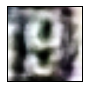

In [272]:
dpi = 192.0
xpixels, ypixels = 256, 256

fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)

plt.imshow(test_X[54, :, :, :].T)
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
from SVHNDigit.models.fcnn_relu_64_128_256_10_softmax.model import FCNN
from SVHNDigit.models.cnn.model import CNN_1, LeNet5Mod, HintonNet
from SVHNDigit.generic import train_model

input_dim = train_X.shape[1:]

num_samples = 9600
train_X_small = train_X[0:num_samples, :, :, :]
train_y_small = train_y[0:num_samples]

lr = 1e-2
decay = 1e-3
reg_factor = 5e-6
dropout_param = 0.1
momentum = 0.9

model_define_params = {'reg_factor': reg_factor, 
                       'init': 'glorot_normal',
                       'use_dropout': True,
                       'dropout_param': dropout_param, 
                       'use_batchnorm': True}    

#cnn = CNN_1(model_define_params, input_dim)
#cnn = LeNet5Mod(model_define_params, input_dim)
cnn = HintonNet(model_define_params, input_dim)
cnn.define(verbose=1)


model_train_params = {'loss': 'categorical_crossentropy', 
                      'optimizer': 'sgd', 
                      'lr': lr,
                      'momentum': momentum,
                      'decay': decay,
                      'nesterov': True,
                      'metrics': ['accuracy'], 
                      'batch_size': 1024, 
                      'nb_epochs': 20}

history = train_model(cnn, model_train_params, train_X, train_y, 
                      val_X, val_y, verbose=1)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_51 (Convolution2D) (None, 64, 32, 32)    4864        convolution2d_input_18[0][0]     
____________________________________________________________________________________________________
batchnormalization_70 (BatchNorma(None, 64, 32, 32)    128         convolution2d_51[0][0]           
____________________________________________________________________________________________________
activation_88 (Activation)       (None, 64, 32, 32)    0           batchnormalization_70[0][0]      
____________________________________________________________________________________________________
maxpooling2d_50 (MaxPooling2D)   (None, 64, 15, 15)    0           activation_88[0][0]              
___________________________________________________________________________________________

In [8]:
import cPickle as pickle

temp1 = {'a': 1, 'b': 'temp'}
temp2 = {'c': 4, 'd': 10}
temp3 = 0.9534

data_store = (temp1, temp2, temp3)


data_store_file = open('model_tuning_temp.p', 'wb')
pickle.dump(data_store, data_store_file)
pickle.dump(data_store, data_store_file)
data_store_file.close()

In [17]:


with open('model_tuning_temp.p', 'rb') as fp:
    pickle_data = pickle.load(fp)

print pickle_data


lists = []
infile = open('model_tuning_temp.p', 'rb')
while True:
    try:
        lists.append(pickle.load(infile))
    except (EOFError, pickle.UnpicklingError):
        break
infile.close()

print lists


({'a': 1, 'b': 'temp'}, {'c': 4, 'd': 10}, 0.9534)
[({'a': 1, 'b': 'temp'}, {'c': 4, 'd': 10}, 0.9534), ({'a': 1, 'b': 'temp'}, {'c': 4, 'd': 10}, 0.9534)]


In [32]:
lists = []
infile = open('../LeNet5Mod_tuning.p', 'rb')
while True:
    try:
        lists.append(pickle.load(infile))
    except (EOFError, pickle.UnpicklingError):
        break
infile.close()

print lists[0][5]

0.226952116135


In [67]:
import pprint

lists_1 = []
lists_2 = []
infile_1 = open('../from_aws/LeNet5Mod_tuning_ip-172-31-47-106.p', 'rb')
infile_2 = open('../from_aws/LeNet5Mod_tuning_ip-172-31-34-30.p', 'rb')

while True:
    try:
        lists_1.append(pickle.load(infile_1))
    except (EOFError, pickle.UnpicklingError):
        break
infile_1.close()

while True:
    try:
        lists_2.append(pickle.load(infile_2))
    except (EOFError, pickle.UnpicklingError):
        break
infile_2.close()

print len(lists_1)
print len(lists_2)

lists = []
lists.extend(lists_1)
lists.extend(lists_2)

outfile = open('../from_aws/LeNet5Mod_tuning.p', 'wb')
pickle.dump(lists, outfile)
outfile.close()

pprint.pprint(lists)

19
18
[({'dropout_param': 0.039752420055025835,
   'init': 'glorot_normal',
   'reg_factor': 3.675229483092498e-05,
   'use_batchnorm': True,
   'use_dropout': True},
  {'batch_size': 256,
   'decay': 0.0003806722554316747,
   'loss': 'categorical_crossentropy',
   'lr': 0.007990732586804453,
   'metrics': ['accuracy'],
   'momentum': 0.8821501220537007,
   'nb_epochs': 5,
   'nesterov': True,
   'optimizer': 'sgd'},
  {'acc': [0.70040993899229154,
           0.8682548314380335,
           0.89531916673139755,
           0.913285367625294,
           0.92560445067075314],
   'loss': [0.97399481327914894,
            0.45489017466546144,
            0.3670187666507323,
            0.31212176486137949,
            0.27111229040199253],
   'val_acc': [0.82928665479024255,
               0.84660267266719191,
               0.87088274063867477,
               0.86316582022605359,
               0.87257669920214997],
   'val_loss': [0.56037156479340278,
                0.48437065077931918,
 

In [ ]:
# Hyperparameter tuning

from SVHNDigit.models.cnn.model import CNN_1
from SVHNDigit.generic import build_tune_model


num_samples = 19200
train_X_small = train_X[0:num_samples, :, :, :]
train_y_small = train_y[0:num_samples]

lr = 1e-2
lr_decay = 1e-3
reg_factor = 2e-6
dropout_param = 0.05
momentum = 0.9


model_define_params = {'reg_factor': reg_factor, 
                       'init': 'glorot_normal',
                       'use_dropout': True,
                       'dropout_param': dropout_param, 
                       'use_batchnorm': True
                      }    

model_train_params = {'loss': 'categorical_crossentropy', 
                      'optimizer': 'sgd', 
                      'lr': lr,
                      'momentum': momentum,
                      'decay': lr_decay,
                      'nesterov': True,
                      'metrics': ['accuracy'], 
                      'batch_size': 256, 
                      'nb_epochs': 2
                     }

model_tune_params = {'lr': [-2.3, -1.3], # [5e-3, 5e-2]
                     'reg_factor': [-6, -5], # [1e-6, 1e-5]
                     'dropout_param': [-2, -0.7], # [0.01, 0.2]
                     'momentum': [-0.1, -0.004] # [0.8, 0.99]
                    }

num_iters = 3

best_params = build_tune_model(model_tune_params,
                               model_train_params,
                               model_define_params,
                               train_X_small, train_y_small,
                               val_X, val_y,
                               num_iters,
                               verbose=1)


In [114]:

# Append to PYTHONPATH
import os
import sys
#sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))

from SVHNDigit.generic import read_dataset, train_model
from SVHNDigit.models.cnn.model import LeNet5Mod

# Load SVHNDigit data

data_dir = '../data'
train_filename = 'train_32x32.mat'
test_filename = 'test_32x32.mat'

print "Loading SVHN Digit Dataset ..."
train_X, train_y, val_X, val_y, test_X, test_y = \
    read_dataset(data_dir, train_filename, test_filename,
                 val_size=10, reshape=False)

# num_samples = 2560
# train_X_small = train_X[0:num_samples, :, :, :]
# train_y_small = train_y[0:num_samples]

# Hyperparameters selected by tuning
lr = 0.08
decay = 3e-3
reg_factor = 5e-6
dropout_param = 0.1
momentum = 0.8

model_define_params = {'reg_factor': reg_factor,
                       'init': 'glorot_normal',
                       'use_dropout': True,
                       'dropout_param': dropout_param,
                       'use_batchnorm': True}

model_train_params = {'loss': 'categorical_crossentropy',
                      'optimizer': 'sgd',
                      'lr': lr,
                      'momentum': momentum,
                      'decay': decay,
                      'nesterov': True,
                      'metrics': ['accuracy'],
                      'batch_size': 256,
                      'nb_epochs': 20}


input_dim = train_X.shape[1:]
cnn = LeNet5Mod(model_define_params, input_dim)
cnn.define(verbose=0)
history = train_model(cnn, model_train_params,
                      train_X, train_y,
                      val_X, val_y,
                      verbose=1)


Loading SVHN Digit Dataset ...
Training data shape:  (73246, 3, 32, 32) (73246, 10)
Validation data shape:  (11, 3, 32, 32) (11, 10)
Test data shape:  (26032, 3, 32, 32) (26032, 10)
Train on 65921 samples, validate on 7325 samples
Epoch 1/20
  768/65921 [..............................] - ETA: 706s - loss: 2.5361 - acc: 0.1302

KeyboardInterrupt: 

In [278]:
from keras.utils import np_utils


pred_y = cnn.model.predict_classes(test_X, batch_size=1024, verbose=1)
print "Test Accuracy: %0.2f" % (np_utils.accuracy(pred_y, np.argmax(test_y, axis=1)))

26032/26032 [==============================] - 137s   
Test Accuracy: 0.84


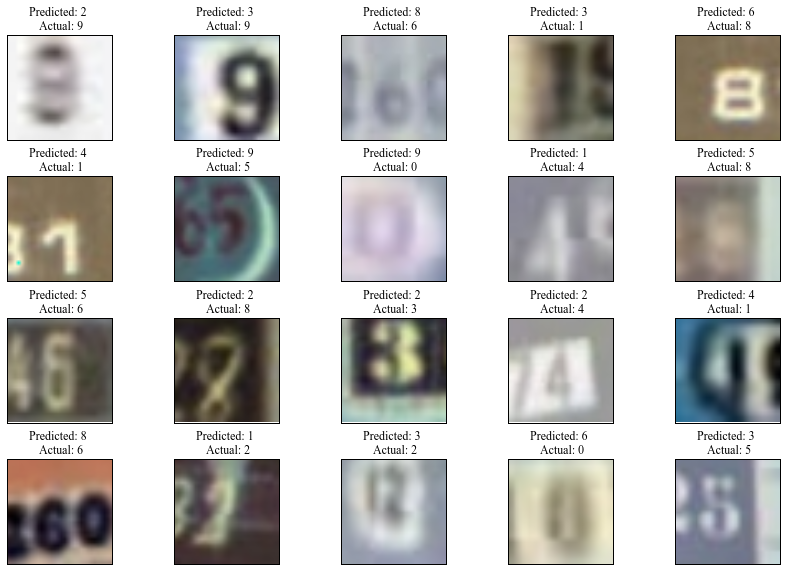

In [13]:
test_X_miss = test_X[np.not_equal(pred_y, np.argmax(test_y, axis=1))]
pred_y_miss = pred_y[np.not_equal(pred_y, np.argmax(test_y, axis=1))]
test_y_miss = np.argmax(test_y, axis=1)[np.not_equal(pred_y, np.argmax(test_y, axis=1))]


fig = plt.figure(figsize=[12, 8])

for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(((test_X_miss[i].T)*255.0).astype(int))
    plt.title('Predicted: %d \n Actual: %d' % (pred_y_miss[i], test_y_miss[i]))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()



In [17]:
json_string = cnn.model.to_json()
open('./LeNet5Mod-architecture.json', 'w').write(json_string)
cnn.model.save_weights('./LeNet5Mod-weights.h5')

In [27]:
import cPickle as pickle

fp = open('../models/cnn/best_LeNet5Mod_model_params.p', 'rb')
model_define_params = pickle.load(fp)
fp.close()

EOFError: 

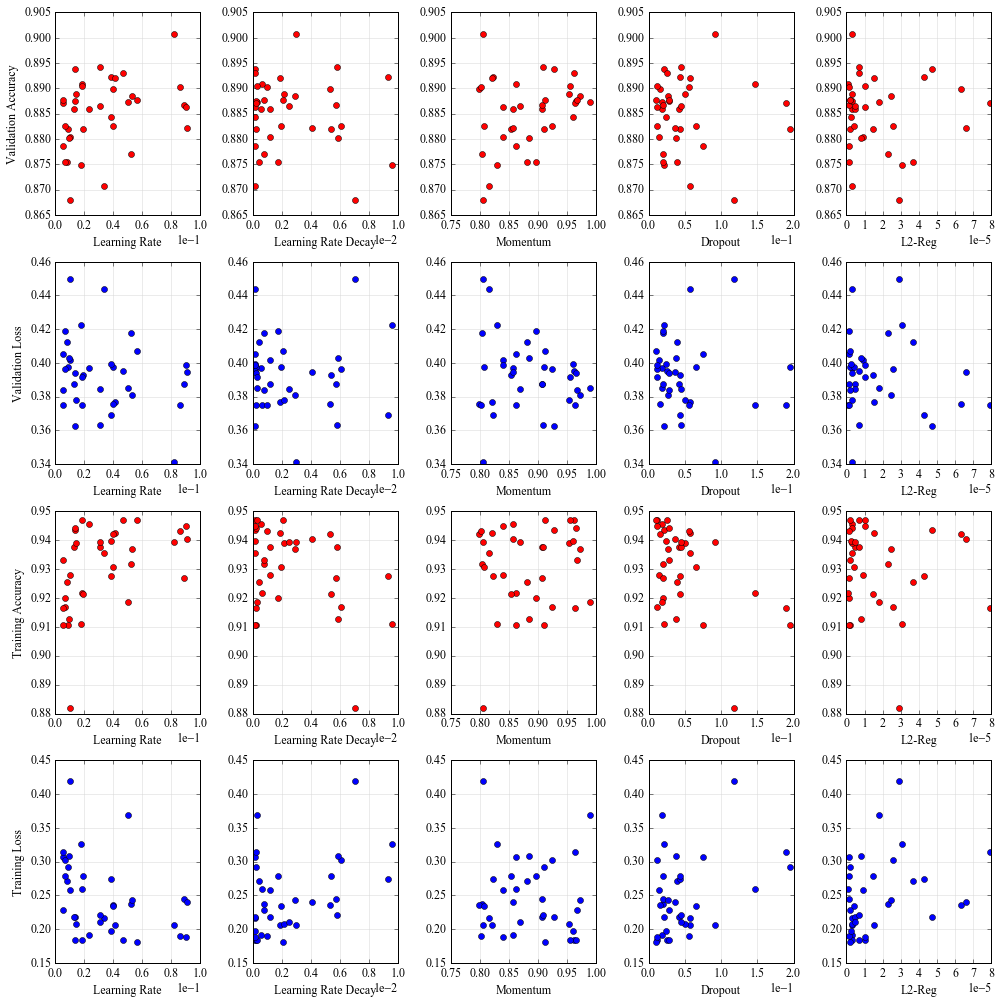

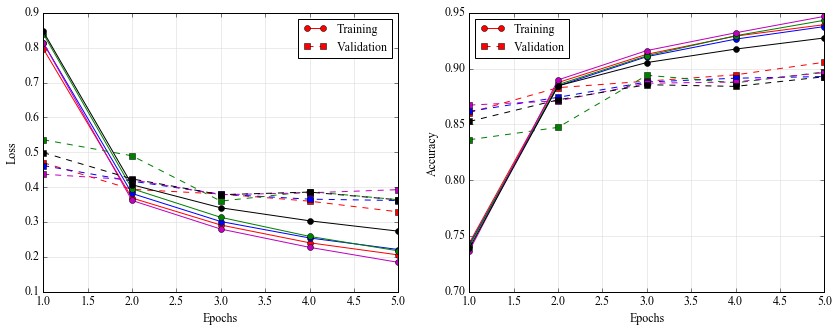

In [107]:
from SVHNDigit.plotting import plot_model_tuning_results


results_file = '../from_aws/LeNet5Mod_tuning.p'
plot_model_tuning_results(results_file)


In [118]:
import cv2

# Camera 0 is the integrated web cam on my netbook
camera_port = 0
 
#Number of frames to throw away while the camera adjusts to light levels
ramp_frames = 30
 
# Now we can initialize the camera capture object with the cv2.VideoCapture class.
# All it needs is the index to a camera port.
camera = cv2.VideoCapture(camera_port)
 
# Captures a single image from the camera and returns it in PIL format
def get_image():
    # read is the easiest way to get a full image out of a VideoCapture object.
    retval, im = camera.read()
    return im
 
# Ramp the camera - these frames will be discarded and are only used to allow v4l2
# to adjust light levels, if necessary
for i in xrange(ramp_frames):
    temp = get_image()
print("Taking image...")
# Take the actual image we want to keep
camera_capture = get_image()
file = "test_image.png"
# A nice feature of the imwrite method is that it will automatically choose the
# correct format based on the file extension you provide. Convenient!
cv2.imwrite(file, camera_capture)
 
# You'll want to release the camera, otherwise you won't be able to create a new
# capture object until your script exits
del(camera)


Taking image...


In [147]:
from keras.utils import np_utils
from SVHNDigit.models.cnn.model import LeNet5Mod

lr = 0.08
decay = 3e-3
reg_factor = 5e-6
dropout_param = 0.1
momentum = 0.8

model_define_params = {'reg_factor': reg_factor,
                       'init': 'glorot_normal',
                       'use_dropout': True,
                       'dropout_param': dropout_param,
                       'use_batchnorm': True}

input_dim = (3, 32, 32)
cnn = LeNet5Mod(model_define_params, input_dim)
cnn.define(verbose=0)
cnn.model.load_weights('../model_data/LeNet5Mod_9Epochs_1.h5')

pred_y = cnn.model.predict_classes(test_X, batch_size=1024, verbose=1)
print "Test Accuracy: %0.2f" % (np_utils.accuracy(pred_y, np.argmax(test_y, axis=1)))

26032/26032 [==============================] - 134s   
Test Accuracy: 0.90


In [162]:
#print pred_y
#print np.argmax(test_y, axis=1)

i = 10
print pred_y[i]
print test_y[i]
fig = plt.figure(figsize=[4, 4])

plt.imshow(((test_X[i].T)*255.0).astype(int))
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()



IndexError: index 10 is out of bounds for axis 0 with size 1

In [277]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    yuv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)
    

    clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(7,7))
    yuv_frame[:, :, 0] = clahe.apply(yuv_frame[:, :, 0])
    frame = cv2.cvtColor(yuv_frame, cv2.COLOR_YUV2BGR)
    frame[:, :, 0] = cv2.equalizeHist(frame[:, :, 0])
    frame[:, :, 1] = cv2.equalizeHist(frame[:, :, 1])
    frame[:, :, 2] = cv2.equalizeHist(frame[:, :, 2])
    
    nrows = frame.shape[0]
    ncols = frame.shape[1]
    if ncols > nrows:
        min_axis = 0
        min_dim = nrows
        max_axis = 1
        max_dim = ncols
        crop_frame = frame[:, (max_dim-min_dim)/2:(max_dim+min_dim)/2]   
    else:
        min_axis = 1
        min_dim = ncols
        max_axis = 0
        max_dim = nrows
        crop_frame = frame[(max_dim-min_dim)/2:(max_dim+min_dim)/2, :]
            
    dim = (512, 512)
    display_frame = cv2.resize(crop_frame, dim, interpolation = cv2.INTER_AREA)
            
    dim = (32, 32)
    process_frame = cv2.resize(crop_frame, dim, interpolation = cv2.INTER_AREA)
    
    process_frame = process_frame.astype(np.float32)
    #process_frame = np.swapaxes(process_frame, 0, 2) 
    process_frame = process_frame.T
    process_frame /= 255.0
    process_frame = process_frame[np.newaxis, :, :, :]
    pred_y = cnn.model.predict_classes(process_frame, batch_size=1, verbose=0)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(display_frame, str(pred_y[0]), (10,500), font, 2, (255,255,255), 4)

    # Display the resulting frame
    cv2.imshow('frame', display_frame)
    # Press Key "q" to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

(32, 32, 3, 26032)


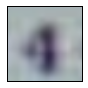

In [203]:

import scipy.io as scipy_io

import cv2

data_dir = '../data'
train_filename = 'train_32x32.mat'
test_filename = 'test_32x32.mat'

# Load SVHN Dataset (single digits)
train_data = scipy_io.loadmat(data_dir + '/' + train_filename)
test_data = scipy_io.loadmat(data_dir + '/' + test_filename)

image_size = train_data['X'].shape[0]
image_depth = train_data['X'].shape[2]

train_X, train_y = train_data['X'], train_data['y']
test_X, test_y = test_data['X'], test_data['y']

#test_X = test_X.T

print test_X.shape

yuv_frames = cv2.cvtColor(test_X[:, :, :, 14], cv2.COLOR_BGR2YUV)

dpi = 192.0
xpixels, ypixels = 256, 256

fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
plt.imshow(test_X[:, :, :, 14])
plt.xticks([])
plt.yticks([])
plt.show()